<a href="https://colab.research.google.com/github/Aicoaching2025/Jeopardy/blob/main/Jeopardy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset from Google Drive
file_path = "/content/drive/My Drive/jeopardy.csv"  # Change this if in a subfolder
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Show Number    Air Date      Round                         Category  Value  \
0         4680  2004-12-31  Jeopardy!                          HISTORY   $200   
1         4680  2004-12-31  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES   $200   
2         4680  2004-12-31  Jeopardy!      EVERYBODY TALKS ABOUT IT...   $200   
3         4680  2004-12-31  Jeopardy!                 THE COMPANY LINE   $200   
4         4680  2004-12-31  Jeopardy!              EPITAPHS & TRIBUTES   $200   

                                            Question      Answer  
0  For the last 8 years of his life, Galileo was ...  Copernicus  
1  No. 2: 1912 Olympian; football star at Carlisl...  Jim Thorpe  
2  The city of Yuma in this state has a record av...     Arizona  
3  In 1963, live on "The Art Linkletter Show", th...  McDonald's  
4  Signer of the Dec. of Indep., framer of the Co

In [30]:
# Define function to filter questions by keywords
def filter_data_frame_by_words(dataframe, column_name, words_to_check):
    words_to_check = [word.lower() for word in words_to_check]
    filtered_df = dataframe[dataframe[column_name].apply(lambda x: all(word in x.lower() for word in words_to_check))]
    return filtered_df

# Filter questions containing specific words
word_list = ['The', 'of']
filtered_dataframe = filter_data_frame_by_words(df_raw, 'Question', word_list)
print(filtered_dataframe)

# Clean "Value" column
df_raw['Value'] = df_raw['Value'].astype(str).str.replace(',', '').str.replace('$', '')
df_raw['Value'] = pd.to_numeric(df_raw['Value'], errors='coerce')



        ShowNumber     AirDate             Round                     Category  \
0             4680  2004-12-31         Jeopardy!                      HISTORY   
2             4680  2004-12-31         Jeopardy!  EVERYBODY TALKS ABOUT IT...   
4             4680  2004-12-31         Jeopardy!          EPITAPHS & TRIBUTES   
5             4680  2004-12-31         Jeopardy!               3-LETTER WORDS   
6             4680  2004-12-31         Jeopardy!                      HISTORY   
...            ...         ...               ...                          ...   
216914        4999  2006-05-11  Double Jeopardy!                    "T" BIRDS   
216916        4999  2006-05-11  Double Jeopardy!                   QUOTATIONS   
216918        4999  2006-05-11  Double Jeopardy!                 OFF-BROADWAY   
216924        4999  2006-05-11  Double Jeopardy!                 OFF-BROADWAY   
216929        4999  2006-05-11   Final Jeopardy!               HISTORIC NAMES   

           Value           

In [31]:

# Load Data
# Use the file_path variable instead of 'jeopardy.csv'
df_raw = pd.read_csv(file_path) # This line was changed to use the correct file path

# Clean Column Names (Remove Spaces)
df_raw.rename(columns=lambda x: x.replace(" ", ""), inplace=True)
print(df_raw.columns)



Index(['ShowNumber', 'AirDate', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')


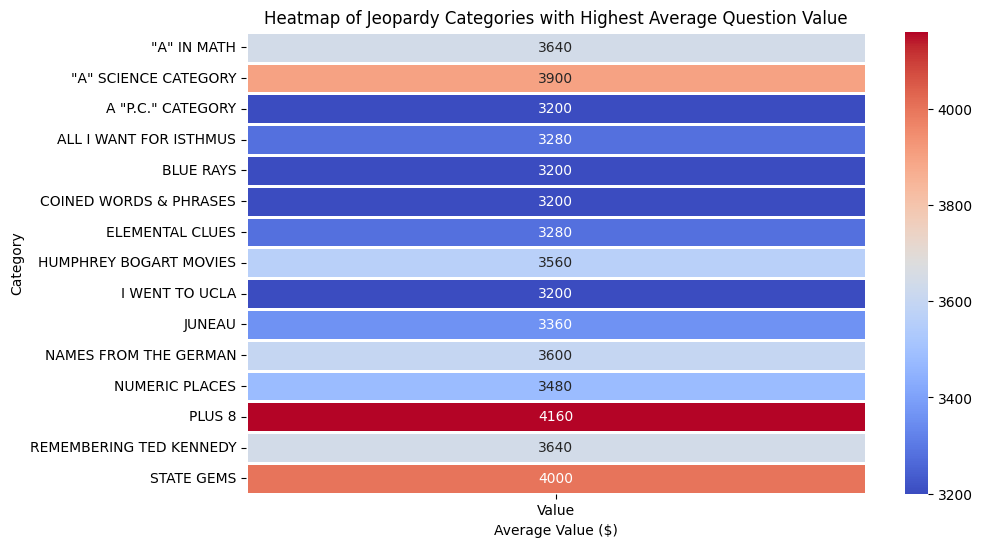

In [32]:
import numpy as np

# Select the top 15 highest-value categories
top_categories_df = top_categories.pivot_table(index="Category", values="Value")

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(top_categories_df, annot=True, fmt=".0f", cmap="coolwarm", linewidths=1)

# Labels and title
plt.xlabel("Average Value ($)")
plt.ylabel("Category")
plt.title("Heatmap of Jeopardy Categories with Highest Average Question Value")
plt.show()


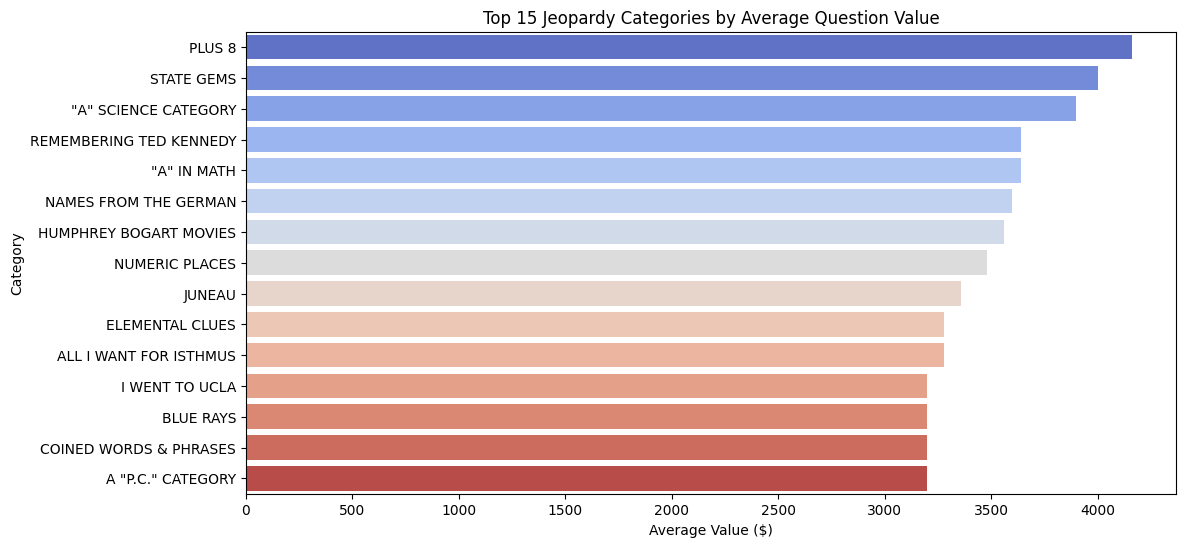

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the top 15 categories by average value
top_categories = av_val.sort_values(by="Value", ascending=False).head(15)

# Fix Seaborn Deprecation Warning
plt.figure(figsize=(12, 6))
sns.barplot(x="Value", y="Category", hue="Category", data=top_categories, palette="coolwarm", legend=False)

# Add labels and title
plt.xlabel("Average Value ($)")
plt.ylabel("Category")
plt.title("Top 15 Jeopardy Categories by Average Question Value")
plt.show()



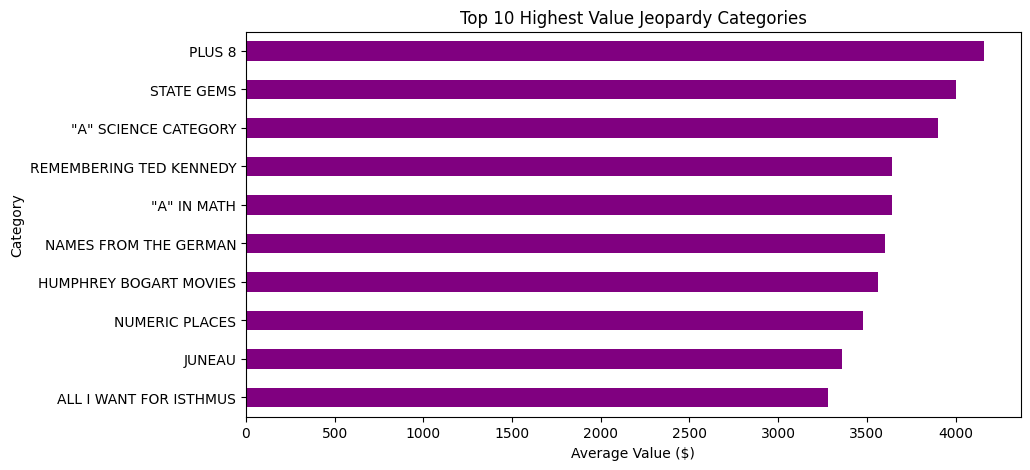

In [35]:
# Visualizing the Top 10 Most Valuable Jeopardy Categories
# Clean "Value" column before grouping
df_raw['Value'] = df_raw['Value'].astype(str).str.replace(',', '').str.replace('$', '')  # Remove commas and dollar signs
df_raw['Value'] = pd.to_numeric(df_raw['Value'], errors='coerce')  # Convert to numeric, handling errors

# Now perform the groupby and mean calculation
top_categories = df_raw.groupby('Category')['Value'].mean().nlargest(10)

plt.figure(figsize=(10,5))
top_categories.sort_values().plot(kind='barh', color='purple')
plt.xlabel("Average Value ($)")
plt.ylabel("Category")
plt.title("Top 10 Highest Value Jeopardy Categories")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Sample Data: Get most common words in Jeopardy questions
all_words = " ".join(df_raw['Question']).split()
common_words = Counter(all_words).most_common(10)

# Convert to DataFrame
word_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Fix the Seaborn Deprecation Warning
plt.figure(figsize=(8, 5))
sns.barplot(x='Count', y='Word', hue='Word', data=word_df, palette="mako", legend=False)

# Labels and Title
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title("Top 10 Most Common Words in Jeopardy Questions")
plt.show()
